In [ ]:
 import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Set pandas formatting options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 500)

In [ ]:
# Load the data per book
book1_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/GOT/book1.csv')
book2_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/GOT/book2.csv')
book3_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/GOT/book3.csv')
book4_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/GOT/book4.csv')
book5_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/GOT/book5.csv')

# Make sure that Source < Target in lexicographical order
book1_df[["Source","Target"]].values.sort()
book2_df[["Source","Target"]].values.sort()
book3_df[["Source","Target"]].values.sort()
book4_df[["Source","Target"]].values.sort()
book5_df[["Source","Target"]].values.sort()

book1_df

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1
...,...,...,...,...,...
679,Tyrion-Lannister,Willis-Wode,Undirected,4,1
680,Tyrion-Lannister,Yoren,Undirected,10,1
681,Tywin-Lannister,Varys,Undirected,4,1
682,Tywin-Lannister,Walder-Frey,Undirected,8,1


In [ ]:
def make_graph(book_df: pd.DataFrame):
  """
  Make graph from single book_df
  Return: nx.Graph object
  """
  G_book = nx.Graph()

  weighted_edge_list = [(row.Source, row.Target, row.weight) for row in book_df.itertuples(index=False)]

  G_book.add_weighted_edges_from(weighted_edge_list)

  return G_book

book1_G = make_graph(book1_df)
book2_G = make_graph(book2_df)
book3_G = make_graph(book3_df)
book4_G = make_graph(book4_df)
book5_G = make_graph(book5_df)


## Print number of nodes and egdes
book_results = []
total_edges = 0
for i, book_graph in enumerate([book1_G, book2_G, book3_G, book4_G, book5_G,]):
  n_edges_ = book_graph.number_of_nodes()
  n_nodes_ = book_graph.number_of_edges()

  book_results.append({
    'Book': i+1,
    'n_edges': n_edges_,
    'n_nodes': n_nodes_,
  })

  total_edges += n_edges_

print(f"Average degree is:", total_edges/5)
pd.DataFrame(book_results)

Average degree is: 268.0


,Book,n_edges,n_nodes
0,1,187,684
1,2,259,775
2,3,303,1008
3,4,274,682
4,5,317,760


In [ ]:
allbook_df=pd.concat([book1_df,book2_df,book3_df,book4_df,book5_df])

allbook_df = allbook_df.sort_values(by=["Source", "Target"])

allbook_df= allbook_df.groupby(["Source", "Target"], as_index=False).agg({"weight": "sum"})

weighted_edge_list = [(row.Source, row.Target, row.weight) for row in allbook_df.itertuples(index=False)]

allbook_G = nx.Graph()

allbook_G.add_weighted_edges_from(weighted_edge_list)

allbook_df_sorted = allbook_df.sort_values(by='weight', ascending=False)

print(allbook_df_sorted.head(5))
print("\n")
print(allbook_df_sorted.tail(5))

                 Source            Target  weight
1334       Eddard-Stark  Robert-Baratheon     334
2031           Jon-Snow     Samwell-Tarly     228
1965  Joffrey-Baratheon       Sansa-Stark     222
1972  Joffrey-Baratheon  Tyrion-Lannister     219
640          Bran-Stark             Hodor     209


                     Source              Target  weight
1809        Jaime-Lannister            Joy-Hill       3
1805        Jaime-Lannister            Jon-Snow       3
1802          Jafer-Flowers       Jaremy-Rykker       3
1801  Jaehaerys-I-Targaryen  Maegor-I-Targaryen       3
0            Addam-Marbrand       Brynden-Tully       3


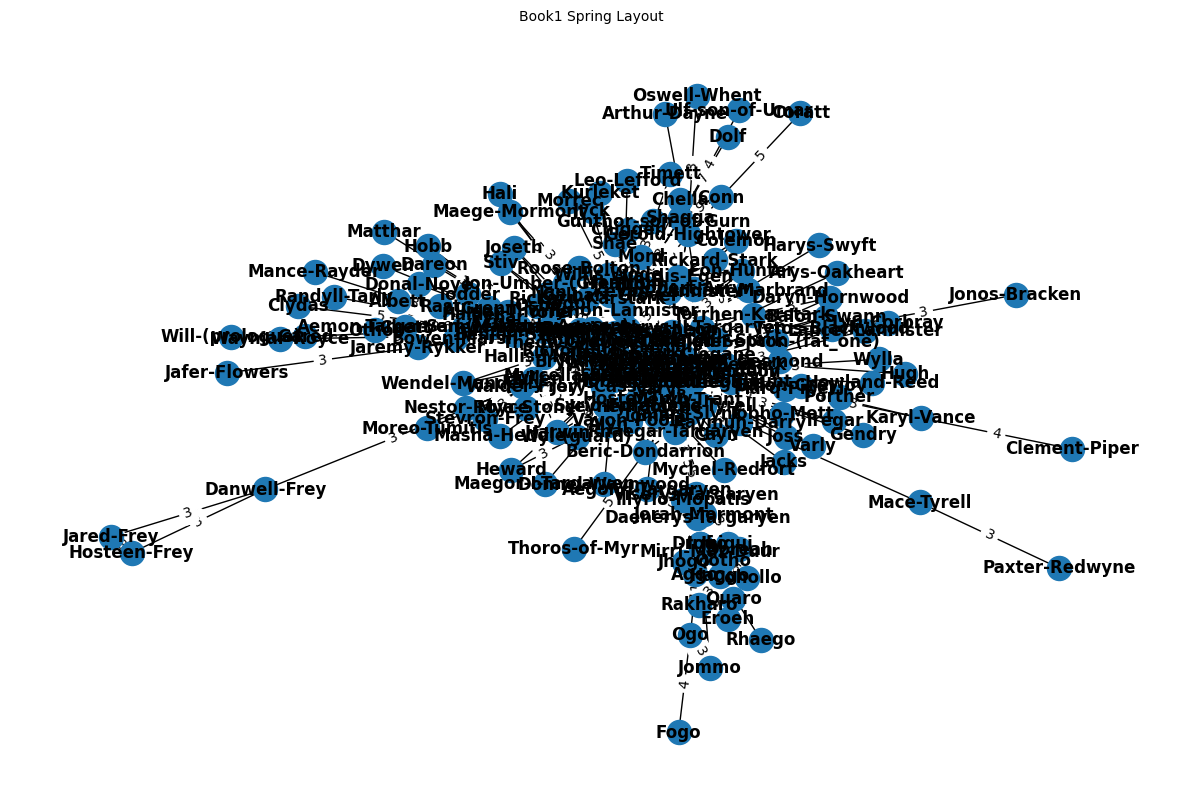

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Book1 Spring Layout", fontsize=10)
edge_weight = nx.get_edge_attributes(book1_G, "weight")
pos = nx.spring_layout(book1_G)
nx.draw(book1_G, pos, with_labels=True, font_weight="bold", ax=ax)
nx.draw_networkx_edge_labels(book1_G, pos, edge_labels = edge_weight, ax=ax)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

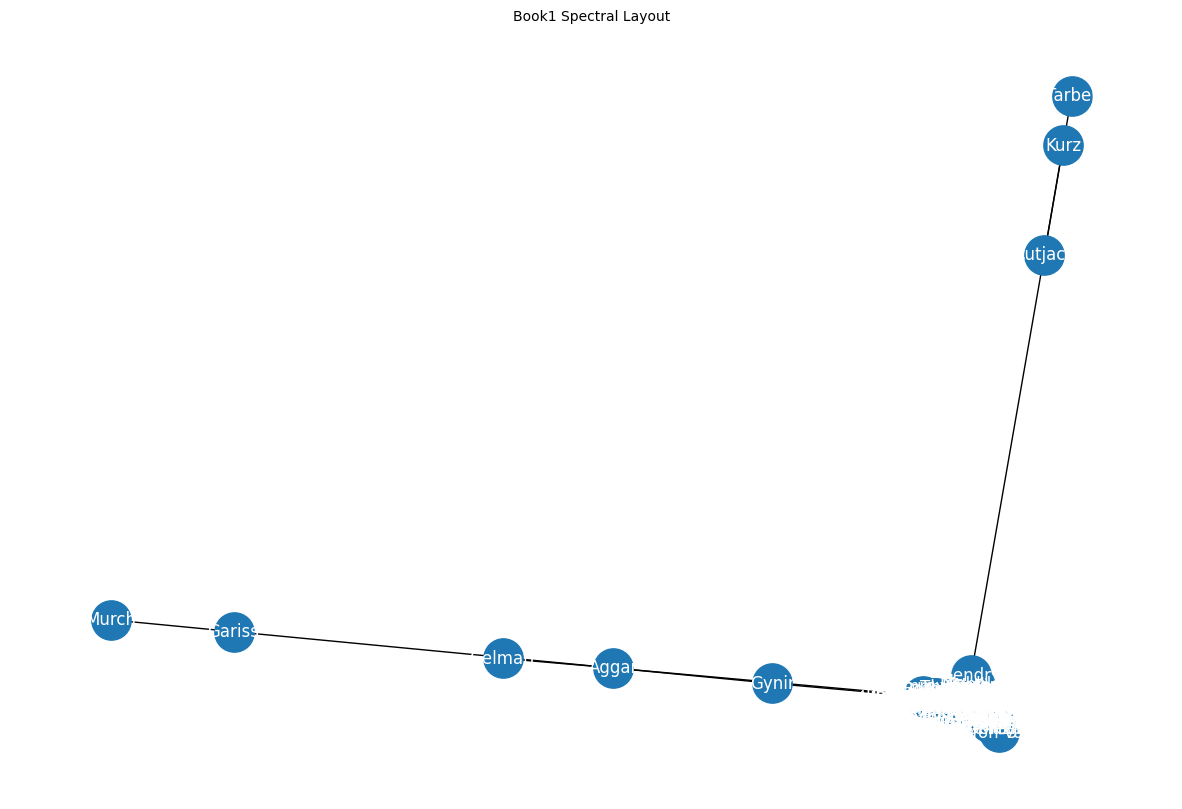

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Book1 Spectral Layout", fontsize=10)

nx.draw_spectral(book2_G, with_labels=True, ax=ax, font_color="white", node_size=800)
plt.show

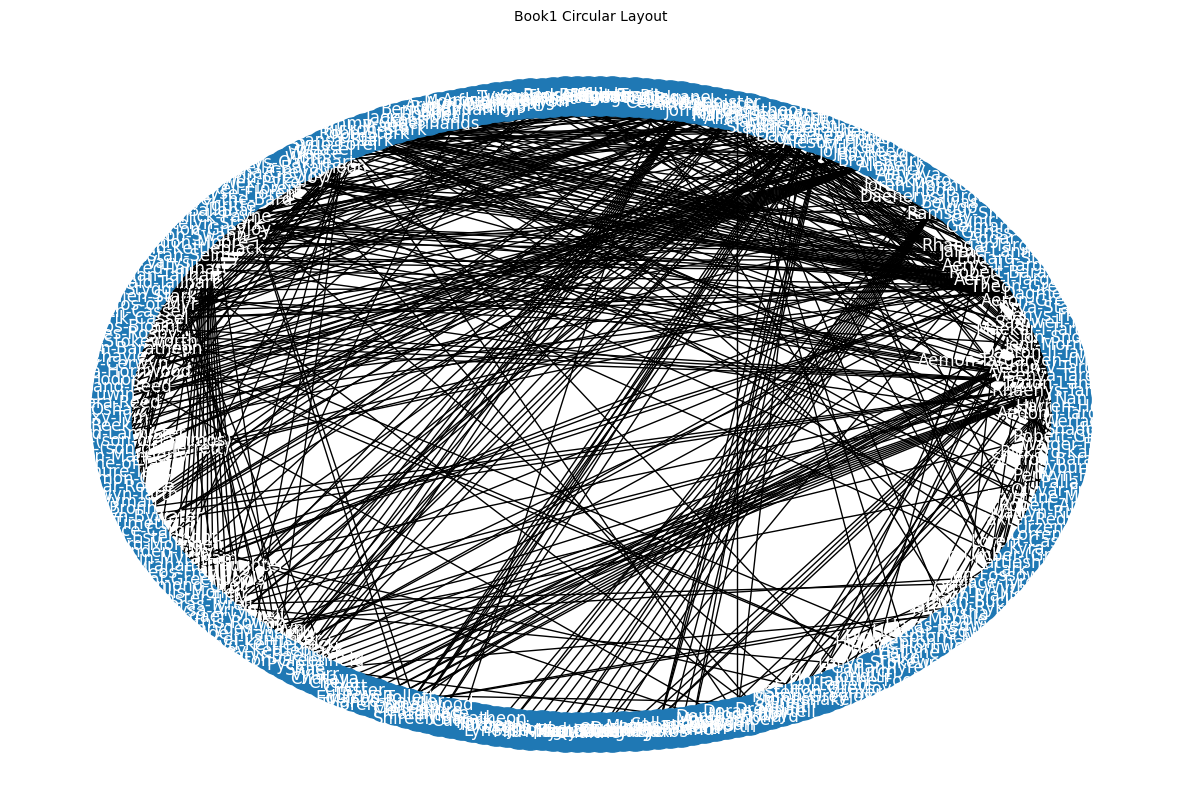

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Book1 Circular Layout", fontsize=10)

nx.draw_circular(book2_G, with_labels=True, ax=ax, font_color="white", node_size=800)
plt.show()

In [ ]:
pr_centrality = nx.pagerank(allbook_G)
sorted(pr_centrality, key=pr_centrality.get, reverse=True)[:5]

['Jon-Snow',
 'Tyrion-Lannister',
 'Cersei-Lannister',
 'Daenerys-Targaryen',
 'Jaime-Lannister']

In [ ]:
# Degree Centrality
deg_centrality = nx.degree_centrality(allbook_G)
sorted(deg_centrality, key=deg_centrality.get, reverse=True)[0:5]

['Tyrion-Lannister',
 'Jon-Snow',
 'Jaime-Lannister',
 'Cersei-Lannister',
 'Stannis-Baratheon']

In [ ]:
# Closeness Centrality,
cl_centrality = nx.closeness_centrality(allbook_G)
sorted(cl_centrality, key=cl_centrality.get, reverse=True)[0:5]

['Tyrion-Lannister',
 'Robert-Baratheon',
 'Eddard-Stark',
 'Cersei-Lannister',
 'Jaime-Lannister']

In [ ]:
# Betweenness Centrality
betw_centrality = nx.betweenness_centrality(allbook_G)
sorted(betw_centrality, key=betw_centrality.get, reverse=True)[0:5]

['Jon-Snow',
 'Tyrion-Lannister',
 'Daenerys-Targaryen',
 'Theon-Greyjoy',
 'Stannis-Baratheon']

**Enter Answer Here:** PageRank and Degree Centrality have the highest overlap with 4 common nodes.

In [ ]:
## YOUR CODE STARTS HERE
for i, book_G in enumerate([book1_G, book2_G, book3_G, book4_G, book5_G], start=1):
    deg_centrality = nx.degree_centrality(book_G)
    top_8_characters = sorted(deg_centrality, key=deg_centrality.get, reverse=True)[:8]
    print(f"Book {i}: {top_8_characters}")


Book 1: ['Eddard-Stark', 'Robert-Baratheon', 'Tyrion-Lannister', 'Catelyn-Stark', 'Jon-Snow', 'Robb-Stark', 'Sansa-Stark', 'Bran-Stark']
Book 2: ['Tyrion-Lannister', 'Joffrey-Baratheon', 'Cersei-Lannister', 'Arya-Stark', 'Stannis-Baratheon', 'Robb-Stark', 'Catelyn-Stark', 'Theon-Greyjoy']
Book 3: ['Tyrion-Lannister', 'Jon-Snow', 'Joffrey-Baratheon', 'Robb-Stark', 'Sansa-Stark', 'Jaime-Lannister', 'Catelyn-Stark', 'Cersei-Lannister']
Book 4: ['Jaime-Lannister', 'Cersei-Lannister', 'Brienne-of-Tarth', 'Tyrion-Lannister', 'Margaery-Tyrell', 'Sansa-Stark', 'Tommen-Baratheon', 'Samwell-Tarly']
Book 5: ['Jon-Snow', 'Daenerys-Targaryen', 'Stannis-Baratheon', 'Tyrion-Lannister', 'Theon-Greyjoy', 'Cersei-Lannister', 'Barristan-Selmy', 'Hizdahr-zo-Loraq']


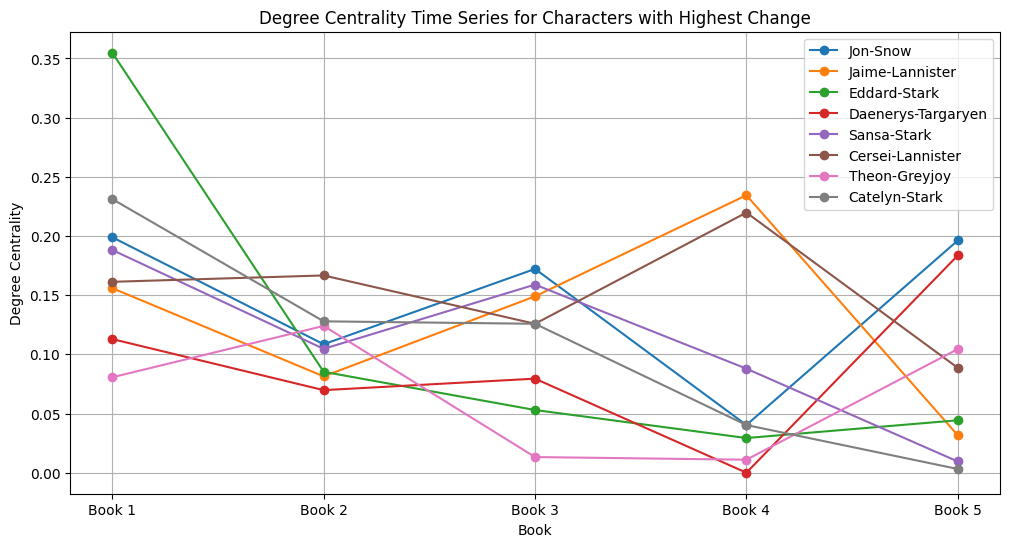

In [ ]:
## YOUR CODE STARTS HERE

all_characters = set()

for book in [book1_G, book2_G, book3_G, book4_G, book5_G]:
  all_characters.update(book.nodes())

centrality_dict = {character: [0] * len([book1_G, book2_G, book3_G, book4_G, book5_G]) for character in all_characters}

for i, book_G in enumerate([book1_G, book2_G, book3_G, book4_G, book5_G]):
    deg_centrality = nx.degree_centrality(book_G)
    for character, centrality in deg_centrality.items():
        centrality_dict[character][i] = centrality

book_labels = ["Book 1", "Book 2", "Book 3", "Book 4", "Book 5"]
df = pd.DataFrame.from_dict(centrality_dict, orient="index", columns=book_labels)

abs_changes = df.diff(axis=1).abs().sum(axis=1)

top_8_characters = abs_changes.nlargest(8).index

plt.figure(figsize=(12, 6))
for character in top_8_characters:
    plt.plot(book_labels, df.loc[character], marker="o", label=character)

plt.xlabel("Book")
plt.ylabel("Degree Centrality")
plt.title("Degree Centrality Time Series for Characters with Highest Change")
plt.legend()
plt.grid()
plt.show()